# Final Assignment Python Programming

### Students :   
- Laura König 57453  
- Mathieu Marchand 62677

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics import gofplots

In [3]:
# IMPORT DATASET
df = pd.read_csv('card_debt.csv')

## A. Descriptive analysis

### 0- Dataset Description

In [4]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,AvgDebt
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,AvgDebt
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
AvgDebt,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  AvgDebt    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


The dataset contains information on average debt in dollars for 400 individuals.

- ‘Income’: individual income in thousands of dollars.
- ‘Limit’: credit limit.
- ‘Rating’: individual credit rating
- ‘Cards’: number of credit cards
- ‘Age’: age in years
- ‘Education’: number of years of education
- ‘Gender’ (categorical): Male or Female
- ‘Student’ (categorical): Yes or No
- ‘Married’ (categorical): Yes or No
- ‘Ethnicity’ (categorical): Asian, African-American or Caucasian
- ‘AvgDebt’: average credit card debt of individuals in $

Our goal is to determine which factors influence the average credit card debt (AvgDebt) for an individual.

There are 400 observations and no missing values in the dataset.

The type of the categorical variables should be converted.

In [7]:
df.Gender = df.Gender.astype('category')
df.Student = df.Student.astype('category')
df.Married = df.Married.astype('category')
df.Ethnicity = df.Ethnicity.astype('category')

### 1- Summary statistics for quantitative variables

In [8]:
# The quantitative variables are Income, Limit, Rating, Cards, Age, Education and AvgDebt.
df.describe().round(2)

,Income,Limit,Rating,Cards,Age,Education,AvgDebt
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,45.22,4735.60,354.94,2.96,55.67,13.45,520.02
std,35.24,2308.20,154.72,1.37,17.25,3.13,459.76
min,10.35,855.00,93.00,1.00,23.00,5.00,0.00
25%,21.01,3088.00,247.25,2.00,41.75,11.00,68.75
50%,33.12,4622.50,344.00,3.00,56.00,14.00,459.50
75%,57.47,5872.75,437.25,4.00,70.00,16.00,863.00
max,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00


There is no missing or negative values.  
We notice that the minimum of AvgDebt is equal to 0.

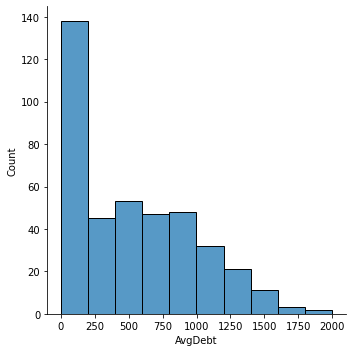

In [9]:
# Count AvgDebt
sns.displot(df.AvgDebt)

A large amount of individuals have 0 AvgDebt. This might have an impact on the result of our prediction so we create a new dataset which contains only active individuals (AvgDebt > 0) for further checks.

In [10]:
df_act = df.loc[df.AvgDebt>0,].copy()
df_act

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,AvgDebt
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
394,49.794,5758,410,4,40,8,Male,No,No,Caucasian,734
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138


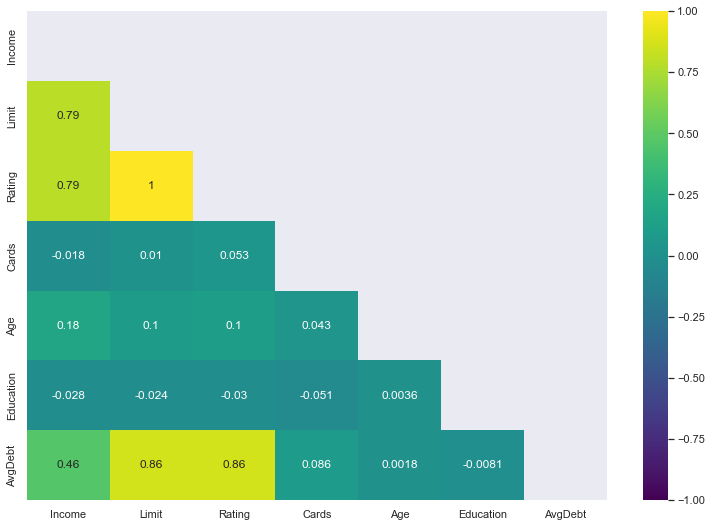

In [11]:
# We want to analyse correlation between quantitable variables in the initial dataset
corr_table = df.corr()

plt.figure(figsize = (13, 9))
sns.set(font_scale = 1.0)
sns.heatmap(corr_table, cmap = "viridis", vmax = 1, vmin = -1, annot = True,
           mask = ~np.tri(corr_table.shape[1], k = -1, dtype=bool));

We have **perfect correlation** between **Limit and Rating** and also a strong correlation between Limit (and Rating) and AvgDebt.  
Income is also quite correlated with AvgDebt (0.46).  
**The other variables are not correlated.**

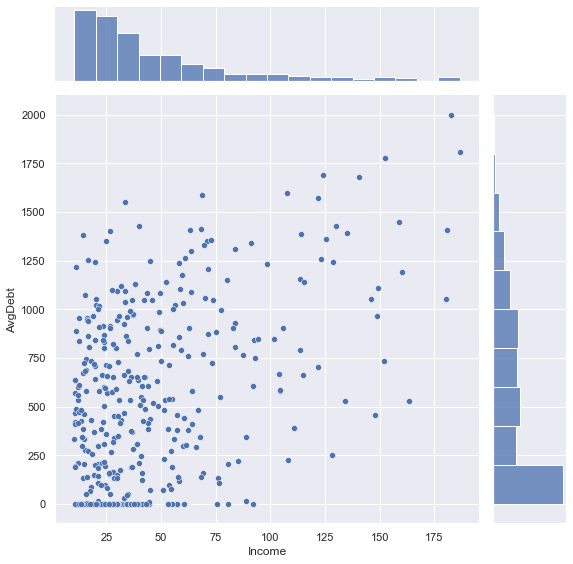

In [12]:
sns.jointplot(data = df, x = "Income", y = "AvgDebt", height = 8, 
             kind = "scatter");

On the graph, we can see that in low Income, the range of AvgDebt is wide.  
But with the increase of revenue, AvgDebt is increasing and it range is reduced.  
Can we increase the correlation between AvgDebt and Income if we only take high value of Income ?

In [13]:
df2 = df[df['Income'] > 100]
corr_table2 = df2.corr()
corr_table2['Income']

Income       1.000000
Limit        0.720439
Rating       0.724813
Cards       -0.092395
Age         -0.091757
Education   -0.043643
AvgDebt      0.399408
Name: Income, dtype: float64

The correlation between income and AvgDebt **does not** increase with only high value of income.

### 2- Summary statistics for categorical variables

In [14]:
df.describe(include=['category'])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


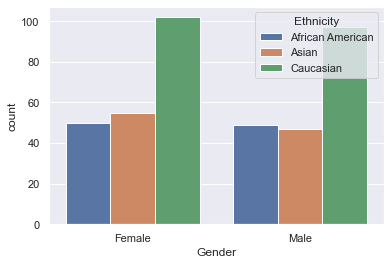

In [15]:
sns.countplot(x = 'Gender', hue='Ethnicity', data = df)
plt.show()

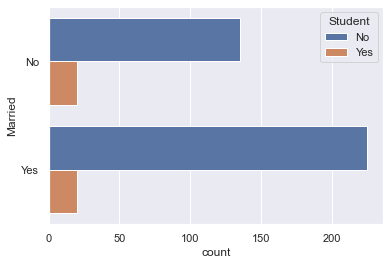

In [16]:
sns.countplot(y = 'Married', hue='Student', data = df)
plt.show()

Our sample countains few students. The half of the sample is composed by Caucasian.  
There are more women than men.  
The two other ethnicities are almost equaly represented.  
In this sample, the half of student are married.

### 3- Summary statistics for the whole dataset

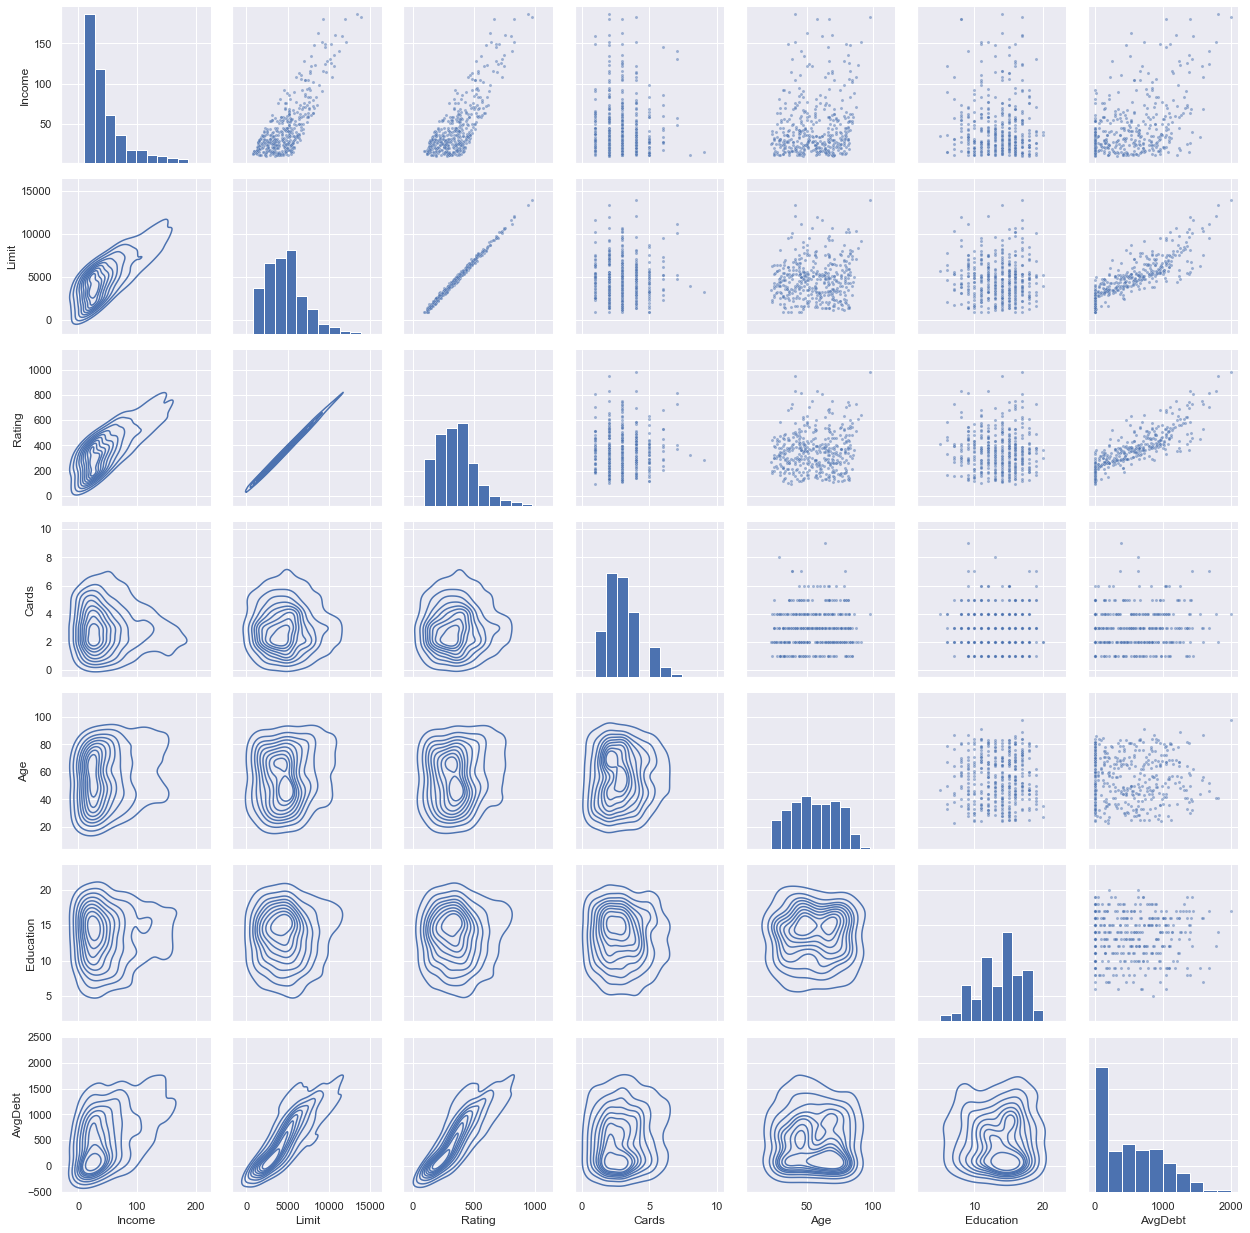

In [17]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot, linewidths = 1, edgecolor = 'w', s = 10, alpha = 0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

We can see on this graph :  
- We have the graphique correlation of the perfect correlation between Rating and Limit
- Income can be normalized with a log fonction
- We have a potential linear relationship between AvgDebt and Rating (or Limit).

C:\Users\33606\.conda\envs\pypr1\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\33606\.conda\envs\pypr1\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\33606\.conda\envs\pypr1\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\33606\.conda\envs\pypr1\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' 

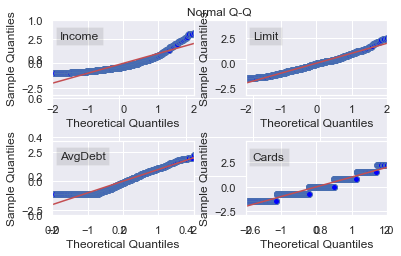

In [18]:
left = -1.8   #x coordinate for text insert

fig = plt.figure()
plt.title('Normal Q-Q')

ax = fig.add_subplot(2, 2, 1)
ax.set_xlim(-2, 2)
sm.graphics.qqplot(df["Income"], line='s', fit=True, ax=ax)
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "Income", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 2)
ax.set_xlim(-2, 2)
sm.graphics.qqplot(df["Limit"], line='s', fit=True, ax=ax)
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "Limit", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(df["AvgDebt"], line='45', fit=True, ax=ax)
ax.set_xlim(-2, 2)
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "AvgDebt", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(df["Cards"], line='45', fit=True, ax=ax)
ax.set_xlim(-2, 2)
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "Cards",
              verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

fig.tight_layout()

#plt.gcf()

The Q-Q Plot shows us that Income should be normalized.

Text(0, 0.5, 'Count')

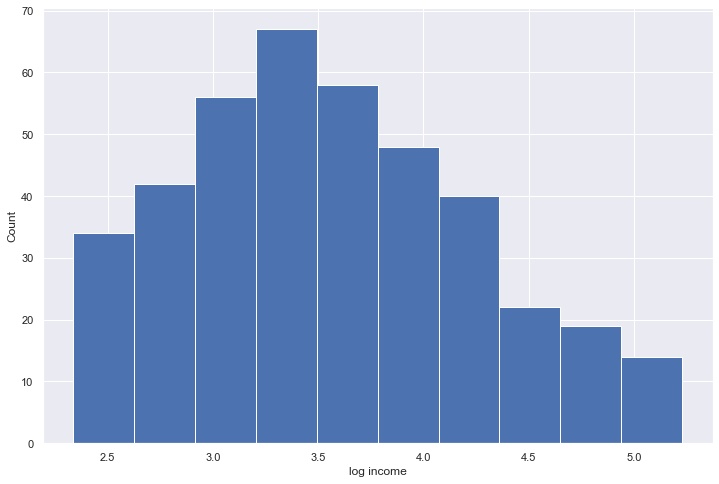

In [19]:
# Normalize Income
df['log_income'] = df['Income'].apply(np.log)
df['log_income'].hist(figsize = (12, 8))
plt.xlabel('log income')
plt.ylabel('Count')

The log(Income) is closer to normal distribution.

## B. Multiple Linear Regression Model to explain the dependent variable AvgDebt

### 1- First model: a Univariate Linear Model

In [20]:
mod1 = smf.ols('AvgDebt ~ Limit', data = df).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                AvgDebt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          2.53e-119
Time:                        22:39:28   Log-Likelihood:                -2748.0
No. Observations:                 400   AIC:                             5500.
Df Residuals:                     398   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -292.7905     26.683    -10.973      0.0

The p-value being very close to zero, we can say that the **Limit variable is statisticallty highly significant**.
In fact, **over 74% (Adjusted R-squared) of the variance of the average credit card debt is captured by changes in the credit limit.** 

If 'Limit' increases with one unit, then 'AvgDebt' increases with 0.1716 units.

A 95% confidence interval for the **Limit coefficient is given by [0.1616 , 0.1816]**

However here the intercept leads to an extrapolation in potential predictions: AvgDebt cannot be below zero, its minimum value is 0, but here the intercept is -292.7905

776.4379086042007 -676.9462192837927


(array([  5.,   8.,  35.,  93., 104.,  84.,  50.,   7.,   6.,   8.]),
 array([-676.94621928, -531.60780649, -386.26939371, -240.93098092,
         -95.59256813,   49.74584466,  195.08425745,  340.42267024,
         485.76108303,  631.09949582,  776.4379086 ]),
 <BarContainer object of 10 artists>)

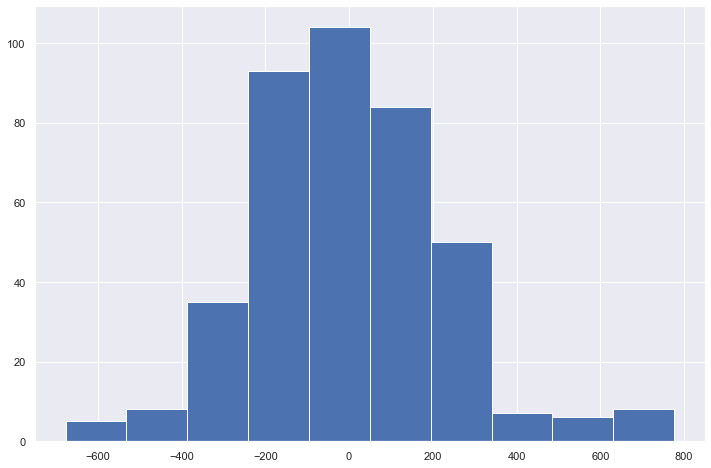

In [21]:
print(mod1.resid.max(), mod1.resid.min())
plt.figure(figsize=(12,8))
plt.hist(mod1.resid)

The range of the residuals is quite wide but the plot of the residuals is normalized, which is good for the spread.

In [22]:
std1 = np.std(mod1.resid)
print('The residual standard error on this model is ' + str(std1))

The residual standard error on this model is 233.0003039650039


In [23]:
# Comparison with model using only active users
mod_test = smf.ols('AvgDebt ~  Limit', data = df_act).fit()
mod_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgDebt   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     531.8
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           4.71e-69
Time:                        22:39:28   Log-Likelihood:                -2151.8
No. Observations:                 310   AIC:                             4308.
Df Residuals:                     308   BIC:                             4315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -209.2924     40.750     -5.136      0.000    -289.476    -129.109
Limit          0.1605      0.007     23.060      0.000       0.147       0.174
==============================================================================
Omnibus:                        8.813   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.619
Skew:                           0.313   Prob(JB):                      0.00815
Kurtosis:                       3.595   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Focusing on only active users, we get statistically significant results, but R-squared is lower so it may not be relevant.

We can reduce the standard deviation from the first model and increase Adjusted R-squared with a Multivariate Linear Model.

## 2- Second Model: a Multivariate Linear Model

In [24]:
mod2 = smf.ols('AvgDebt ~ Limit + log_income + Age + Student + Ethnicity + Married', data = df).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                AvgDebt   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     631.6
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          4.55e-209
Time:                        22:39:28   Log-Likelihood:                -2517.8
No. Observations:                 400   AIC:                             5052.
Df Residuals:                     392   BIC:                             5084.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                491

On this model, we can see that **Ethnicity and Married are not a good indicator** for estimate the AvgDebt because **P-value is above 5%.**

In [25]:
mod3 = smf.ols('AvgDebt ~ Limit + log_income + Age + Student', data = df).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                AvgDebt   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1104.
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          7.39e-213
Time:                        22:39:28   Log-Likelihood:                -2519.5
No. Observations:                 400   AIC:                             5049.
Df Residuals:                     395   BIC:                             5069.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        493.0296     41.493     11.

In [26]:
mod3.params

Intercept         493.029615
Student[T.Yes]    416.358316
Limit               0.240010
log_income       -308.947839
Age                -0.905145
dtype: float64

**AvgDebt = 493 + X1 * 416 + X2 * 0.24 + X3 * (-309) + X4 * (-0.9)**
with :
- X1 = 1 if student, 0 otherwise  
- X2 = Limit
- X3 = log(income)
- X4 = Age  (significative at 2%)  
This formula explains 92% of AvgDebt  
Note: our sample is enough wide to avoid multicollinearity problems

In [27]:
std3 = np.std(mod3.resid)
print('The residual standard error on this model is ' + str(round(std3, 2)) + '. It is less than the residual standard error of the first model : ' + str(round(std1, 2)))

The residual standard error on this model is 131.59. It is less than the residual standard error of the first model : 233.0


(array([ 3.,  5.,  8., 28., 71., 78., 60., 79., 44., 24.]),
 array([-440.21478353, -368.79346844, -297.37215335, -225.95083827,
        -154.52952318,  -83.10820809,  -11.68689301,   59.73442208,
         131.15573716,  202.57705225,  273.99836734]),
 <BarContainer object of 10 artists>)

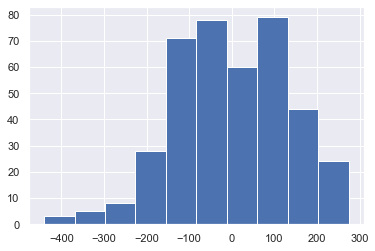

In [28]:
plt.hist(mod3.resid)

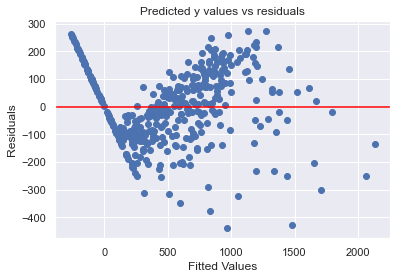

In [29]:
plt.scatter(mod3.fittedvalues, mod3.resid)
plt.axhline(0, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Predicted y values vs residuals')
plt.show()

Even though we have improved the results on the regression summary, the information related to the residuals do not seem to have progressed: the residuals aren't as symetric as the univariate linear model.

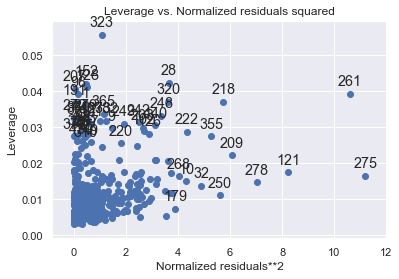

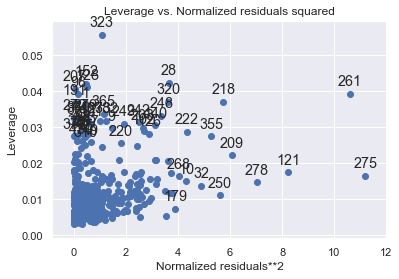

In [30]:
# Looking for potential outliers
from statsmodels.graphics import regressionplots
regressionplots.plot_leverage_resid2(mod3)

In [31]:
df.loc[[261, 275, 323]]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,AvgDebt,log_income
261,180.379,9310,665,3,67,8,Female,Yes,Yes,Asian,1050,5.195060
275,163.329,8732,636,3,50,14,Male,No,Yes,Caucasian,529,5.095767
323,182.728,13913,982,4,98,17,Male,No,Yes,Caucasian,1999,5.207999


None of the points seems invalid, even though Incomes for observations 261 and 323 are among the highest in the dataset.

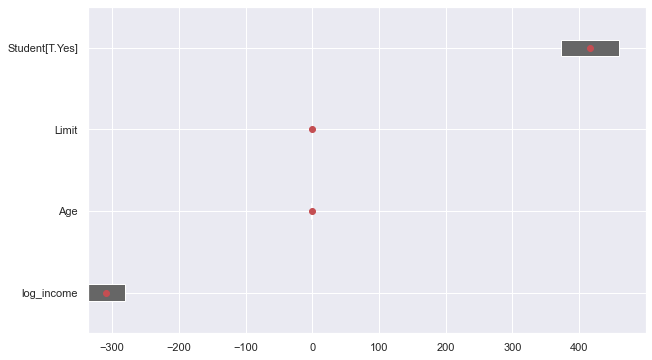

In [32]:
def plot_confidence_intervals(centers, conf_ints, zero_line = False):
    """
    Plot centers and confidence intervals
    
    Arguments:
    centers: Series containing center points (mean values)
    conf_ints: DataFrame containing the lower bound in the 0th column and upper bound in the 1st
    zero_line: Boolean specifying whether to include a line at x = 0 (optional, default = False)
    """
    plt.figure(figsize = (10, 6))
    sort_index = np.argsort(centers.values)
    centers = centers[sort_index]
    conf_ints = conf_ints.iloc[sort_index]
    plt.barh(y = range(len(centers)), 
             left = conf_ints[0], #start by min confidence interval
             width = conf_ints[1] - conf_ints[0],
             height = 0.2,
             color = '0.4')
    plt.yticks(range(len(centers)), conf_ints.index)
    plt.plot(centers, range(len(centers)), 'ro',)
    
    if zero_line:
        plt.plot([0, 0], [-0.5, len(centers) - 0.5], 
                 color = 'gray', 
                 linestyle = 'dashed')
        plt.xlim((-0.05, 1.1 * conf_ints.iloc[:, 1].max()))
    plt.ylim((-0.5, len(centers) - 0.5))
    
    
plot_confidence_intervals(mod3.params[1:],
                          mod3.conf_int().iloc[1:, :], 
                          zero_line = False)

In [33]:
mod3.params

Intercept         493.029615
Student[T.Yes]    416.358316
Limit               0.240010
log_income       -308.947839
Age                -0.905145
dtype: float64

The coefficients are clearly more important for log_income and for Student.

In [34]:
df[df['Student'] == 'Yes']['AvgDebt'].mean()

876.825

In [35]:
df[df['Student'] == 'No']['AvgDebt'].mean()

480.36944444444447

In general, Student have a really high AvgDebt compare with no-Student. That is why the coefficient of Student is really high.

# Conclusion

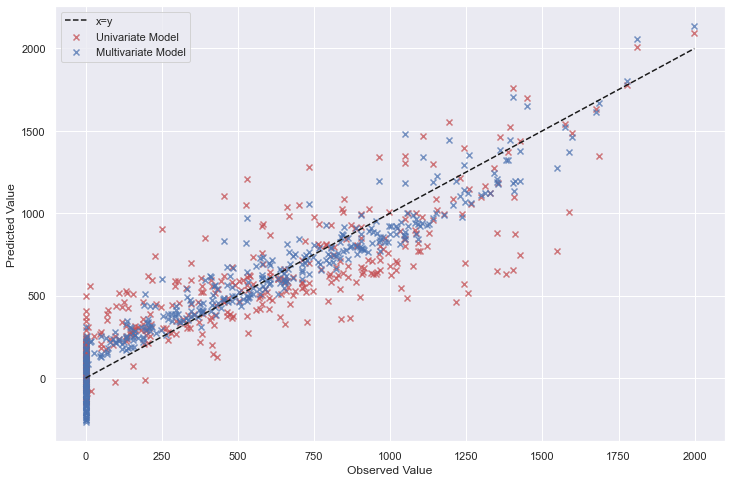

In [36]:
plt.figure(figsize = (12, 8))
plt.scatter(df['AvgDebt'], mod1.fittedvalues, 
            c = 'r', marker = 'x', alpha = 0.75, label = 'Univariate Model')
plt.scatter(df['AvgDebt'], mod3.fittedvalues, 
            c = 'b', marker = 'x', alpha = 0.75, label = 'Multivariate Model')
avgdebt_range = [df['AvgDebt'].min(), df['AvgDebt'].max()]
plt.plot(avgdebt_range, avgdebt_range, '--k', label = 'x=y')
plt.xlabel('Observed Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

There are rather good results with the Multivariate Linear model we presented, with a quite high R-Square. On the graph above we also see that the latest model are closer to the x=y line.  
However, even if the standard deviation was reduced, the  "shape" of the residuals still seems to follow a trend, which suggests that we could find a better model and that linear regressions may not be the most appropriate.  
Using a quadratic model based on variable 'Income' could lead to an even better prediction, so it may be a possible improvement for the model.